In [1]:
! pip install numpy opencv-python scikit-image matplotlib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


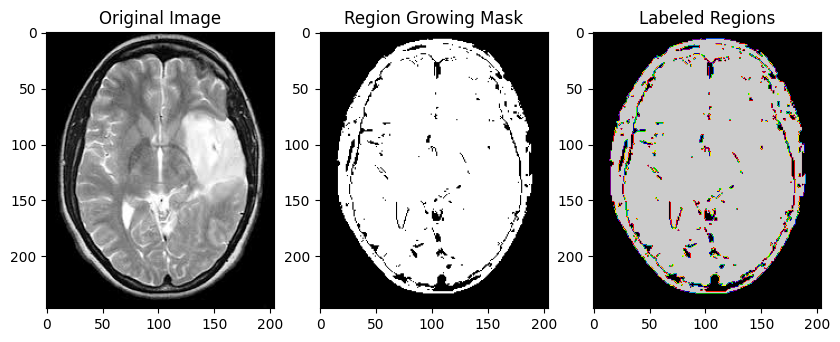

In [28]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold):
    # Initialize the mask and the list of points to check
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask[seed_point] = 1
    region_pixels = [seed_point]

    # Region growing process
    while region_pixels:
        current_pixel = region_pixels.pop(0)
        x, y = current_pixel

        # Check the 8 neighboring pixels
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip the center pixel

                neighbor = (x + dx, y + dy)
                if (0 <= neighbor[0] < image.shape[0] and
                    0 <= neighbor[1] < image.shape[1]):
                    # Check if the pixel is within the threshold
                    if (abs(int(image[neighbor]) - int(image[current_pixel])) < threshold and
                        mask[neighbor] == 0):
                        mask[neighbor] = 1
                        region_pixels.append(neighbor)

    return mask

def extract_features(image_path, seed_point, threshold):
    # Load the MRI image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply region growing
    mask = region_growing(image, seed_point, threshold)

    # Label the regions
    labeled_image = measure.label(mask)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Region Growing Mask')
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Labeled Regions')
    plt.imshow(labeled_image, cmap='nipy_spectral')
    plt.show()

    return labeled_image


image_path = 'C:/Users/desai/OneDrive/Desktop/M.Tech Projects/Dataset/brain_tumor_dataset/yes/y1473.jpg'  # Provide  path of MRI image
seed_point = (100, 100)  # Replace with your chosen seed point
threshold = 15  # Adjust the threshold as needed
features = extract_features(image_path, seed_point, threshold)
